### Importing Important Modules and Database connectors

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 1.7 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [2]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt

### Collecting And Processing Data
* Our main goal is to process the target protien structure `independent variable`
* And predict the `IC50` value the `dependent variable`
* To process the chemical structure Ww will be using `Padel Descripter` later on

In [3]:
target = new_client.target
target_query = target.search('Leukemia')
target_result = pd.DataFrame.from_dict(target_query)

In [4]:
target_result

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Myeloid leukemia factor 2,14.0,False,CHEMBL4295830,"[{'accession': 'Q15773', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,[],Homo sapiens,Leukemia cells,13.0,False,CHEMBL614844,[],CELL-LINE,9606.0
2,[],Murine leukemia virus,Murine leukemia virus,11.0,False,CHEMBL613746,[],ORGANISM,11786.0
3,[],Feline leukemia virus,Feline leukemia virus,11.0,False,CHEMBL612745,[],ORGANISM,11768.0
4,[],Homo sapiens,Sodium-dependent phosphate transporter 1,11.0,False,CHEMBL4295909,"[{'accession': 'Q8WUM9', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
82,"[{'xref_id': 'P04409', 'xref_name': None, 'xre...",Bos taurus,Protein kinase C alpha,4.0,False,CHEMBL2213,"[{'accession': 'P04409', 'component_descriptio...",SINGLE PROTEIN,9913.0
83,"[{'xref_id': 'P05696', 'xref_name': None, 'xre...",Rattus norvegicus,Protein kinase C alpha,4.0,False,CHEMBL2855,"[{'accession': 'P05696', 'component_descriptio...",SINGLE PROTEIN,10116.0
84,"[{'xref_id': 'P20444', 'xref_name': None, 'xre...",Mus musculus,Protein kinase C alpha,4.0,False,CHEMBL2567,"[{'accession': 'P20444', 'component_descriptio...",SINGLE PROTEIN,10090.0
85,"[{'xref_id': 'P63319', 'xref_name': None, 'xre...",Rattus norvegicus,Protein kinase C gamma,4.0,False,CHEMBL3604,"[{'accession': 'P63319', 'component_descriptio...",SINGLE PROTEIN,10116.0


In [5]:
selected_target1 = 'CHEMBL4361'
selected_target1

'CHEMBL4361'

In [6]:
activity1 = new_client.activity
res = activity1.filter(target_chembl_id=selected_target1).filter(standard_type='IC50')
df1 = pd.DataFrame.from_dict(res)

In [7]:
df1.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1773940,[],CHEMBL909447,Displacement of FAM-Bid from human Mcl1 by FP ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Induced myeloid leukemia cell differentiation ...,9606,None,None,IC50,uM,UO_0000065,None,0.052
1,None,1773941,[],CHEMBL909447,Displacement of FAM-Bid from human Mcl1 by FP ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Induced myeloid leukemia cell differentiation ...,9606,None,None,IC50,uM,UO_0000065,None,1.03
2,None,1826038,[],CHEMBL918622,Displacement of biotinylated Bim BH3 peptide f...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Induced myeloid leukemia cell differentiation ...,9606,None,None,IC50,nM,UO_0000065,None,39.0


### Only Selecting the required Columns

In [8]:
columns = ['canonical_smiles','molecule_chembl_id','standard_value']

In [9]:
df1_selected = df1[columns]

In [10]:
len(df1_selected)

1843

### Fixing Missing Values
* For that I am using mean() of the column `standard_value`
* For values greater than `100000000` I am going to limit it to `100000000` so after converting to log value it will not show any negative value
* Then we will finally apply to convert all `standard_value` to log of `standard_value` so it will fix high deviation and outliers(most of them atleast)

In [11]:
df1_selected.isnull().sum()

canonical_smiles       2
molecule_chembl_id     0
standard_value        10
dtype: int64

In [12]:
df1_selected['standard_value'].dtype

dtype('O')

In [13]:
df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)

<ipython-input-13-3a9a20ee965c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)


In [14]:
df1_selected['standard_value'].dtype

dtype('float64')

In [15]:
df1_selected['standard_value'].head(3)

0      52.0
1    1030.0
2      39.0
Name: standard_value, dtype: float64

In [16]:
try:
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
df1_selected.isnull().sum()

canonical_smiles      2
molecule_chembl_id    0
standard_value        0
dtype: int64

In [18]:
if df1_selected['canonical_smiles'].isnull().sum() > 0:
  df1_selected = df1_selected.dropna(axis=0)

In [19]:
len(df1_selected)

1841

In [20]:
def norm_val(data):
  for i in data['standard_value']:
    if i > 100000000:
      data['standard_value'] = data['standard_value'].replace(i,100000000)
  return data['standard_value']

In [21]:
def convert_log(data):
  pIC50 = []
  for i in data['standard_value']:
    data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
  return data['standard_value']

In [22]:
df1_selected.describe()

,standard_value
count,1.841000e+03
mean,1.579548e+04
std,8.345958e+04
min,2.000000e-01
25%,1.736770e+03
50%,3.881870e+03
75%,9.300000e+03
max,2.725000e+06


In [23]:
df1_selected['standard_value'] = norm_val(df1_selected)

In [24]:
df1_selected['standard_value'] = convert_log(df1_selected)

In [25]:
df1_selected['standard_value'].head()

0    7.283997
1    5.987163
2    8.130244
3    4.437826
4    8.086901
Name: standard_value, dtype: float64

In [26]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [27]:
try:
  df1_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

### Creating labels and features

In [28]:
df1_x = df1_selected.drop(columns=['standard_value'],axis=1)
df1_y = df1_selected['standard_value']

In [29]:
len(df1_x),len(df1_y)

(1841, 1841)

In [30]:
df1_x.to_csv('molecule.smi', sep='\t', index=False, header=False)
df1_y.to_csv('leukemia_labels.csv',index=False)

### A quick look at files

In [31]:
! ls

leukemia_labels.csv  molecule.smi  sample_data


In [32]:
! cat molecule.smi | head -5

CC[C@H](C)[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@H](CC(=O)O)NC(=O)[C@H](CCC(=O)O)NC(=O)[C@@H](N)CCC(N)=O)[C@@H](C)CC)[C@@H](C)CC)C(=O)N[C@@H](C)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](Cc1c[nH]cn1)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@H](C(=O)NCC(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CO)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CCCN=C(N)N)C(=O)O)C(C)C	CHEMBL410802
CC(C)c1ccccc1Cc1cc(C(=O)Nc2ccc(S(=O)(=O)c3ccccc3C(C)(C)C)cc2)c(O)c(O)c1O	CHEMBL217354
CN(CCCc1ccccc1)S(=O)(=O)c1cc(C(=O)N2CCc3ccc(S(=O)(=O)NCCc4ccccc4)cc3C2)c(O)c(O)c1O	CHEMBL376055
CC(C)c1cc(C(=O)c2ccccc2)c(O)c(O)c1O	CHEMBL269836
O=C(c1ccc(Oc2ccccc2)cc1)c1cc(C(=O)c2nc3ccccc3s2)c(O)c(O)c1O	CHEMBL258819


### Using padel Descriptor to break it into dataset form

In [33]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-03-10 10:19:04--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-10 10:19:05--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   146MB/s    in 0.2s    

2023-03-10 10:19:05 (146 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-03-10 10:19:05--  https://github

In [34]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [35]:
! bash padel.sh

Processing CHEMBL217354 in molecule.smi (2/1841). 
Processing CHEMBL410802 in molecule.smi (1/1841). 
Processing CHEMBL376055 in molecule.smi (3/1841). Average speed: 6.47 s/mol.
Processing CHEMBL269836 in molecule.smi (4/1841). Average speed: 4.86 s/mol.
Processing CHEMBL259034 in molecule.smi (6/1841). Average speed: 2.69 s/mol.
Processing CHEMBL258819 in molecule.smi (5/1841). Average speed: 3.50 s/mol.
Processing CHEMBL259033 in molecule.smi (7/1841). Average speed: 2.41 s/mol.
Processing CHEMBL270268 in molecule.smi (8/1841). Average speed: 2.13 s/mol.
Processing CHEMBL552735 in molecule.smi (9/1841). Average speed: 1.83 s/mol.
Processing CHEMBL541427 in molecule.smi (10/1841). Average speed: 1.71 s/mol.
Processing CHEMBL538616 in molecule.smi (11/1841). Average speed: 1.77 s/mol.
Processing CHEMBL541496 in molecule.smi (12/1841). Average speed: 1.74 s/mol.
Processing CHEMBL553474 in molecule.smi (13/1841). Average speed: 1.86 s/mol.
Processing CHEMBL552287 in molecule.smi (14/184

### Model selection and usage

### Importing Modules

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge,OrthogonalMatchingPursuit,LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold , cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Using different models and importing processed data 

In [37]:
X = pd.read_csv('descriptors_output.csv')
Y = pd.read_csv('leukemia_labels.csv')

In [38]:
len(X),len(Y)

(1841, 1841)

In [39]:
Y['standard_value'].isnull().sum()

0

In [40]:
for i in Y['standard_value']:
  Y['standard_value'] = Y['standard_value'].replace(i,round(i,2))

In [41]:
Y.standard_value.unique()

array([7.28, 5.99, 8.13, 4.44, 8.09, 5.57, 5.51, 6.08, 6.55, 6.23, 8.08,
       6.64, 8.62, 8.14, 8.05, 6.48, 8.17, 4.94, 4.9 , 8.19, 8.26, 8.28,
       8.23, 8.25, 5.14, 5.45, 4.77, 4.81, 5.03, 5.7 , 5.02, 5.46, 4.4 ,
       4.69, 5.36, 4.53, 4.66, 8.35, 4.18, 5.06, 5.29, 5.17, 4.47, 5.37,
       5.04, 5.53, 5.31, 5.63, 6.35, 4.85, 4.6 , 4.55, 4.88, 4.64, 4.73,
       4.54, 4.79, 5.87, 4.31, 4.7 , 5.26, 5.13, 5.39, 5.  , 4.23, 5.01,
       5.08, 5.21, 4.62, 4.93, 4.87, 5.2 , 5.18, 4.74, 4.52, 4.68, 4.42,
       4.96, 6.36, 4.82, 4.43, 4.3 , 4.11, 5.76, 4.57, 5.07, 4.97, 5.54,
       5.27, 5.22, 4.72, 4.95, 5.68, 4.8 , 4.92, 4.98, 4.63, 5.34, 5.43,
       5.9 , 5.71, 5.15, 5.32, 5.33, 5.48, 5.19, 5.42, 5.91, 5.5 , 5.58,
       5.47, 5.64, 4.59, 5.78, 5.23, 5.83, 5.35, 5.49, 4.75, 5.55, 5.12,
       4.61, 5.28, 5.66, 5.16, 5.89, 5.81, 5.59, 5.77, 5.84, 5.56, 6.05,
       5.67, 5.52, 6.12, 5.79, 5.24, 5.82, 5.88, 4.91, 4.71, 5.93, 5.8 ,
       5.85, 5.25, 5.94, 5.62, 6.03, 5.73, 5.86, 5.

In [42]:
Y.describe()

,standard_value
count,1841.000000
mean,6.145763
std,1.307595
min,2.560000
25%,5.270000
50%,5.560000
75%,8.090000
max,9.400000


In [43]:
Y = Y.to_numpy().ravel()
X = X.drop(columns=['Name'],axis=1)

In [44]:
X.head(5)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
Y[:5]

array([7.28, 5.99, 8.13, 4.44, 8.09])

In [46]:
X.shape

(1841, 881)

### Defining all the Regressors

In [47]:
rfe = RandomForestRegressor(n_estimators = 100)
dtree = DecisionTreeRegressor()
svr = SVR()
etree = ExtraTreesRegressor()
lin_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
oth = OrthogonalMatchingPursuit()

In [48]:
def evaluation(y,predictions):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    r2 = r2_score(y,predictions)
    return mae,mse,rmse,r2

### Using different regressors and finding best fit model for our dataset

In [49]:
rmse_arr = []
r2_arr=[]

### Random Forest Tree

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.20415216597060581

Mean Sqaured Error : 1.3820490223408588

Mean Absolute Error : 0.8485785034139298

Root Mean Squared : 1.1756058107804923


### Decision Tree Regressor

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
dtree.fit(X_train,Y_train)
Y_pred = dtree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.4383208566166956

Mean Sqaured Error : 2.4977512643781994

Mean Absolute Error : 1.0755040650406504

Root Mean Squared : 1.5804275574597526


### Support Vector Regressor

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.22217657202696028

Mean Sqaured Error : 1.3507482991330864

Mean Absolute Error : 0.7928257580056274

Root Mean Squared : 1.1622169759270797


### Extra Tree Regression

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
etree.fit(X_train,Y_train)
Y_pred = etree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.3296764309623943

Mean Sqaured Error : 2.309082129603919

Mean Absolute Error : 1.0429467389340568

Root Mean Squared : 1.5195664281642705


### Lasso Regression

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lasso.fit(X_train,Y_train)
Y_pred = lasso.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.013451526642875411

Mean Sqaured Error : 1.7599340372583145

Mean Absolute Error : 1.135389732090256

Root Mean Squared : 1.3266250552655465


### Ridge Regression

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
ridge.fit(X_train,Y_train)
Y_pred = ridge.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.10066680401395744

Mean Sqaured Error : 1.561759058862103

Mean Absolute Error : 0.9717690894693334

Root Mean Squared : 1.249703588400907


### Orthogonal Matching Pursuit Regressor

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
oth.fit(X_train,Y_train)
Y_pred = oth.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.14097005333964652

Mean Sqaured Error : 1.491769465442325

Mean Absolute Error : 0.9463012631956581

Root Mean Squared : 1.2213801478009723


### Linear Regression

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -3.909931681334116e+22

Mean Sqaured Error : 6.7898874967696165e+22

Mean Absolute Error : 31444832568.977493

Root Mean Squared : 260574125668.10266


### Model Performance

In [58]:
import seaborn as sns

In [59]:
di = {"Name":["Random Forest","Decision Tree","Support Vector","Extra Tree","Lasso","Ridge","Orthogonal","Linear"],
      "RMSE":rmse_arr,"R_Sq":r2_arr}

In [60]:
model_performance = pd.DataFrame.from_dict(di)

In [61]:
model_performance

,Name,RMSE,R_Sq
0,Random Forest,1.175606e+00,2.041522e-01
1,Decision Tree,1.580428e+00,-4.383209e-01
2,Support Vector,1.162217e+00,2.221766e-01
3,Extra Tree,1.519566e+00,-3.296764e-01
4,Lasso,1.326625e+00,-1.345153e-02
5,Ridge,1.249704e+00,1.006668e-01
6,Orthogonal,1.221380e+00,1.409701e-01
7,Linear,2.605741e+11,-3.909932e+22


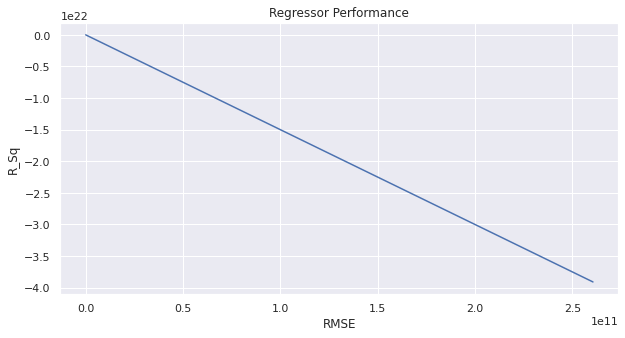

In [62]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='RMSE',y='R_Sq',data=model_performance).set(title='Regressor Performance')

### Using model with lowest rmse

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))

In [64]:
rmse

1.1871305987177339

### Saving model state for later use

In [65]:
import pickle

pickle.dump(rfe,open("leukemia_model.pkl","wb"))